Reto: Autotransporte Federal de Turismo

Act:DS_C5_SC51 Reto

Eduardo Frias Rosales

Objetivo:

Con el desarrollo del reto integrarás todos los conocimientos adquiridos, cumpliendo los siguientes objetivos:


•	Realizar un análisis exploratorio de los datos para conocer su estructura y contenido.
•	Visualizar información relevante en gráficas por medio del uso del comando SEABORN.
•	Utilizar varios tipos de gráficos para detectar patrones, tendencias y relaciones entre los datos.

Introducción:

El Autotransporte Federal de Turismo, se presta en los caminos de jurisdicción federal sin estar sujetos a horarios o rutas determinadas.

De conformidad a la operación del servicio y tipo de vehículos se clasifican en:
•	Automóvil.
•	Autobús.
•	Camioneta.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2 Carga los datos.
reto1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Visualización del análisis descriptivo/reto_1.csv', encoding='latin-1')
reto3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Visualización del análisis descriptivo/reto_3.csv', encoding='latin-1')

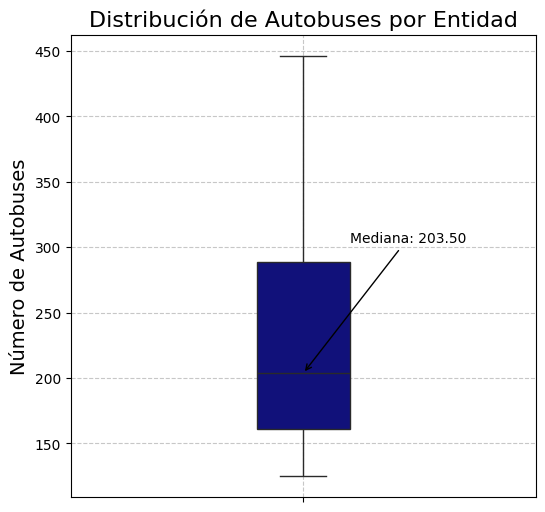

In [3]:
# 3 genera una gráfica de caja de bigotes para hallar la mediana de los autobuses que tienen las entidades.

# Calcula la media de la columna 'Autobus'
media_autobus = reto3['Autobus'].median()

# Crea la gráfica de caja de bigotes
plt.figure(figsize=(6, 6))  # Ajusta el tamaño de la figura
sns.boxplot(y=reto3['Autobus'], width=0.2, color='darkblue')  # Ajusta el ancho del boxplot

# Agrega una anotación con el valor de la media
plt.annotate(f'Mediana: {media_autobus:.2f}', xy=(0, media_autobus), xytext=(0.1, media_autobus + 100),
             arrowprops=dict(arrowstyle='->'))

# Personaliza la gráfica
plt.title('Distribución de Autobuses por Entidad', fontsize=16)
plt.ylabel('Número de Autobuses', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)


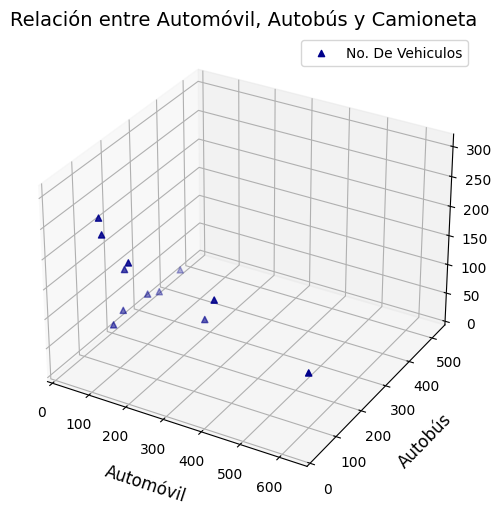

In [4]:
# 4.	Elabora una gráfica en 3 dimensiones utilizando unicamente seaborn donde relacionarás las variables Automóvil, Autobús, y camioneta.

# Crea la gráfica en 3D
fig = plt.figure(figsize=(6, 6))  # Ajusta el tamaño de la figura
ax = fig.add_subplot(projection='3d')

# Grafica los puntos con colores y marcadores personalizados
ax.scatter(reto3['Automovil'], reto3['Autobus'], reto3['Camioneta'], c='darkblue', marker='^', label='No. De Vehiculos')

# Etiqueta los ejes
ax.set_xlabel('Automóvil', fontsize=12, labelpad=10)
ax.set_ylabel('Autobús', fontsize=12, labelpad=10)
ax.set_zlabel('Camioneta', fontsize=12, labelpad=10)

# Título del gráfico
ax.set_title('Relación entre Automóvil, Autobús y Camioneta', fontsize=14)

# Ajusta los límites de los ejes
ax.set_xlim(0, max(reto3['Automovil']) + 100)
ax.set_ylim(0, max(reto3['Autobus']) + 100)
ax.set_zlim(0, max(reto3['Camioneta']) + 100)

# Agrega una grilla
ax.grid(True, linestyle='--', alpha=0.6)

# Agrega una leyenda
ax.legend()

# Muestra la gráfica
plt.show()



Text(0, 0.5, 'Residuales')

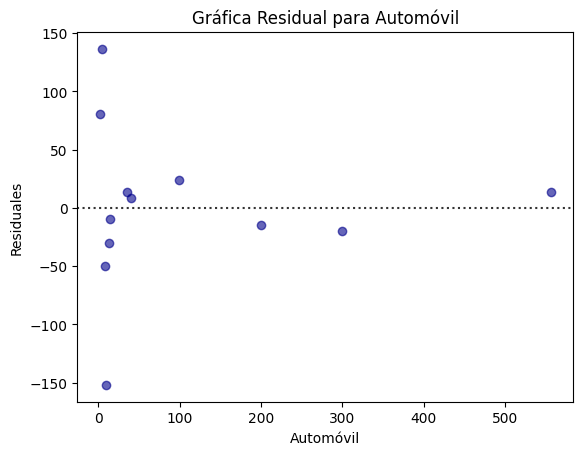

In [9]:
# 5.	Construye una gráfica residual de las 3 variables, automóvil (variable dependiente) junto con autobús y camioneta. Las dos últimas son las variables independientes. Automovil en X y Error en y

# Ajusta un modelo de regresión lineal múltiple
X = reto3[['Autobus', 'Camioneta']]
y = reto3['Automovil']
model = LinearRegression().fit(X, y)

# Calcula los valores predichos
y_pred = model.predict(X)

# Calcula los residuos
residuals = y_pred - y

# Crea un DataFrame para los residuos y la variable dependiente
df_residuals = pd.DataFrame({'Automovil': reto3['Automovil'], 'Residuals': residuals})

# Grafica los residuos contra la variable dependiente
sns.residplot(x='Automovil', y='Residuals', data=df_residuals, color='darkblue', scatter_kws={'alpha': 0.6})
plt.title('Gráfica Residual para Automóvil')
plt.xlabel('Automóvil')
plt.ylabel('Residuales')



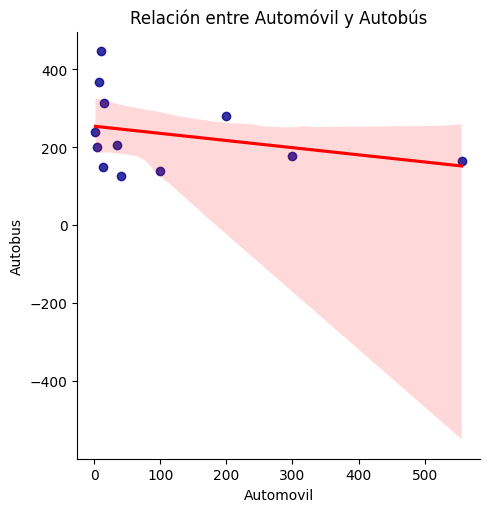

In [14]:
# 6.	Indica si existe alguna relación de ajuste entre la variable automóvil y autobuses.  Se obtiene el gráfico de dispersión con recta de ajustes, se personaliza.

# Gráfico de dispersión con recta de ajuste
sns.lmplot(x='Automovil', y='Autobus', data=reto3, line_kws={'color': 'red'}, scatter_kws={'color': 'darkblue'})
plt.title('Relación entre Automóvil y Autobús')
plt.xlabel('Automovil')
plt.ylabel('Autobus')
plt.show()


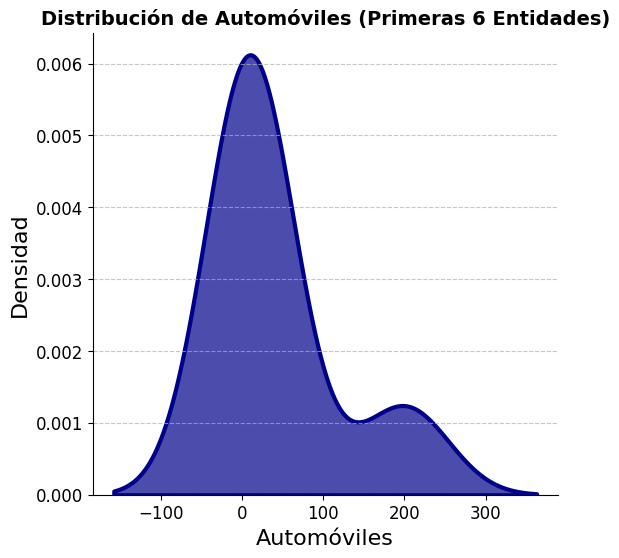

In [45]:
# 7.	Realiza una gráfica de kdeplot que muestre la relación entre los automóviles y el número de autobuses de las primeras 6 entidades. Personaliza la grafica.

# Selecciona las primeras 6 entidades
subset_data = reto3.head(6)

# Crea la gráfica de kdeplot
plt.figure(figsize=(6, 6))  # Ajusta el tamaño de la figura
sns.kdeplot(
    x='Automovil',
    data=subset_data,
    fill=True,
    color='darkblue',
    alpha=0.7,
    linewidth=3,
)

# Personaliza la gráfica
plt.title(
    'Distribución de Automóviles (Primeras 6 Entidades)',
    fontsize=14,
    fontweight='bold',
)
plt.xlabel('Automóviles', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()  # Elimina los bordes superior y derecho
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

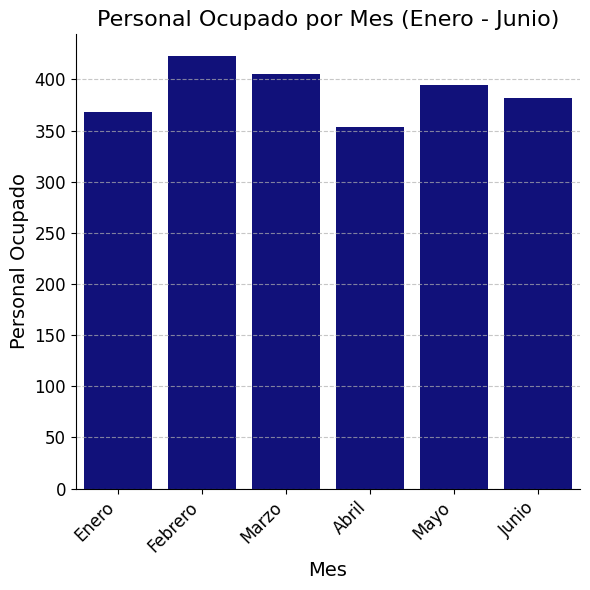

In [48]:
#8.	Realiza una grafica de barras que relacione el personal con el número de meses. Únicamente de enero a junio.

# Filtra los datos para los meses de enero a junio
meses_seleccionados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
reto1_filtrado = reto1[reto1['Meses'].isin(meses_seleccionados)]

# Crea la gráfica de barras
plt.figure(figsize=(6, 6))
sns.barplot(x='Meses', y='Personal ', data=reto1_filtrado, color='darkblue')

# Personaliza la gráfica
plt.title('Personal Ocupado por Mes (Enero - Junio)', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Personal Ocupado', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()


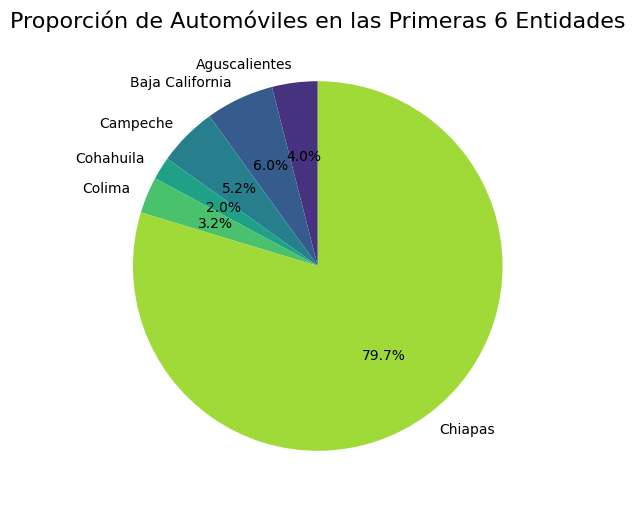

In [49]:
# 9.	Realiza una gráfica de pastel que relacione los automóviles con las primeras 6 entidades de la tabla.

# Selecciona las primeras 6 entidades y sus valores de automóviles
entidades_top6 = reto3['Entidad'].head(6)
automoviles_top6 = reto3['Automovil'].head(6)

# Crea la gráfica de pastel
plt.figure(figsize=(6, 6))
plt.pie(automoviles_top6, labels=entidades_top6, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 6))
plt.title('Proporción de Automóviles en las Primeras 6 Entidades', fontsize=16)
plt.show()


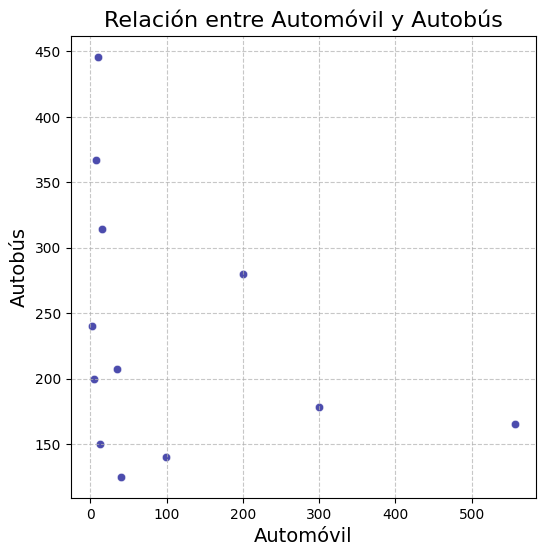

Observando la gráfica de dispersión, se puede inferir 
que existe una relación positiva débil o nula entre la 
cantidad de automóviles y autobuses. Esto significa que 
un aumento en la cantidad de automóviles no necesariamente 
implica un aumento en la cantidad de autobuses, y viceversa.


In [51]:
# 10.	De la base de datos obtén la gráfica de dispersión para la relación entre automóvil vs autobús e indica qué tipo de relación tienen los datos independientes.

# Gráfico de dispersión para Automóvil vs Autobús
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Automovil', y='Autobus', data=reto3, color='darkblue', alpha=0.7)
plt.title('Relación entre Automóvil y Autobús', fontsize=16)
plt.xlabel('Automóvil', fontsize=14)
plt.ylabel('Autobús', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Observando la gráfica de dispersión, se puede inferir \n"
  "que existe una relación positiva débil o nula entre la \n"
  "cantidad de automóviles y autobuses. Esto significa que \n"
  "un aumento en la cantidad de automóviles no necesariamente \n"
  "implica un aumento en la cantidad de autobuses, y viceversa.")
